In [1]:
# Day 1
# Part one
with open('day1.txt') as fid:
    data = fid.read().strip().split('\n')
number_set = set('0123456789')
number_sum = 0
for d in data:
    numbers = [s for s in d if s in number_set]
    number_sum += int(numbers[0] + numbers[-1])
print(number_sum)

# Part two
number_list = [c for c in '0123456789'] + ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
number_sum = 0
for d in data:
    first_val = min([(s, index) for index, n in enumerate(number_list) if (s := d.find(n))  != -1])[1] % 10
    last_val  = max([(s, index) for index, n in enumerate(number_list) if (s := d.rfind(n)) != -1])[1] % 10
    number_sum += int(str(first_val) + str(last_val))
print(number_sum)

54597
54504


In [2]:
# Day 2
# Part one
with open('day2.txt') as fid:
    data = fid.read().strip().split('\n')
games = []
colour_index = {'red':0, 'green':1, 'blue':2}
for line in data:
    turns = line.split(':')[1].split(';')
    this_game = []
    for t in turns:
        this_turn = [0, 0, 0]
        for colour_and_number in t.split(','):
            number, colour = colour_and_number.strip().split()
            this_turn[colour_index[colour]] = int(number)
        this_game.append(this_turn)
    games.append(this_game)
id_sum = 0
# 12 red cubes, 13 green cubes, and 14 blue cubes
limit = [12, 13, 14]
for game_id_minus_one, game in enumerate(games):
    game_impossible = False
    for t in game:
        if t[0] > limit[0] or t[1] > limit[1] or t[2] > limit[2]:
            game_impossible = True
            break
    if not game_impossible:
        id_sum += game_id_minus_one + 1
            
print(id_sum)

#Part two
power_sum = 0
for game in games:
    required = [0, 0, 0]
    for t in game:
        for index in range(3):
            required[index] = max(required[index], t[index])
    power_sum += required[0]*required[1]*required[2]
print(power_sum)

2679
77607


In [3]:
# Day 3
# Part one
from collections import defaultdict
with open('day3.txt') as fid:
    engine_map = [c for c in fid.read()]

Nx = engine_map.index('\n') + 1
Ny = len(engine_map)//Nx

all_numbers = []
dict_of_potential_gears = defaultdict(list)
number = []
digits = set(c for c in '0123456789')
digits_and_dot = {'.', '\n'} | digits
for flatidx, c in enumerate(engine_map):
    if c in digits:
        number.append(c)
    elif number:
        #New number, check:
        j, i = flatidx // Nx, flatidx % Nx
        ndigits = len(number)
        check_point_offsets = [(-1,0), (ndigits,0)] + [(nd,1) for nd in range(-1, ndigits + 1)] + [(nd,-1) for nd in range(-1, ndigits + 1)]
        start_point = (j, i - ndigits)
        add_number = False
        for di, dj in check_point_offsets:
            jj, ii = start_point[0] + dj, start_point[1] + di
            if not ((0 <= ii < Nx) and (0 <= jj < Ny)):
                continue
            flat_idx_test = jj*Nx + ii
            if engine_map[flat_idx_test] not in digits_and_dot:
                add_number = True
                if engine_map[flat_idx_test] == '*':
                    dict_of_potential_gears[flat_idx_test].append(int(''.join(number)))
                # We cannot break here, since there could be multiple * around a number
        if add_number:
            all_numbers.append(int(''.join(number)))
        number = []

print(sum(all_numbers))
# Part two
gear_ratio_sum = 0
for key, val in dict_of_potential_gears.items():
    if len(val) != 2:
        continue
    gear_ratio_sum += val[0]*val[1]
print(gear_ratio_sum)

537832
81939900


In [4]:
# Day 4
# Part one
with open('day4.txt') as fid:
    data = fid.read().strip().split('\n')

scratch_wins = []
for line in data:
    index_colon, index_sep = line.find(':'), line.find('|')
    winning_numbers = set(int(d) for d in line[(index_colon + 1):index_sep].split())
    played_numbers  = set(int(d) for d in line[(index_sep + 1):].split())
    scratch_wins.append(len(winning_numbers & played_numbers))
print(sum(2**(s - 1) for s in scratch_wins if s > 0))

# Part two
card_stash = [1]*len(scratch_wins)
for i, wins in enumerate(scratch_wins):
    for j in range(wins):
        if (i + 1 + j) >= len(scratch_wins):
            break
        card_stash[i + 1 + j] += card_stash[i]
print(sum(card_stash))

24160
5659035


In [5]:
# Day 5
# Part one
with open('day5.txt') as fid:
    data = fid.read().strip().split('\n\n')

seeds = [int(num) for num in data[0].split(':')[1].split()]
if_list_dict = {}
for j in range(1, len(data)):
    tmp = data[j].split('\n')
    if_list_dict[tmp[0][:-1]] = [[int(c) for c in s.split()] for s in tmp[1:]]

def apply_if_from_list(x, if_list):
    for il in if_list:
        if il[1] <= x < (il[1] + il[2]):
            x += il[0] - il[1]
            break
    return x

location_numbers = []
for s in seeds:
    for val in if_list_dict.values():
        s = apply_if_from_list(s, val)
    location_numbers.append(s)
print(min(location_numbers))

#Part two
def apply_if_from_list_inverse(x, if_list):
    for il in if_list:
        if il[0] <= x < (il[0] + il[2]):
            x += il[1] - il[0]
            break
    return x

test_location = 51399228 - 4
not_found = True
while not_found:
    s = test_location
    for val in reversed(if_list_dict.values()):
        s = apply_if_from_list_inverse(s, val)
    # Test if seed is in range:
    for i in range(0, len(seeds), 2):
        if seeds[i] <= s < (seeds[i] + seeds[i + 1]):
            not_found = False
            print(test_location)
            break
    test_location += 1

535088217
51399228


In [6]:
# Day 6
# Part one
import math
import numpy as np
with open('day6.txt') as fid:
    data = fid.read().strip().split('\n')
times = [int(d) for d in (data[0].split(':')[1]).split()]
dists = [int(d) for d in (data[1].split(':')[1]).split()]
def get_margin(T, R):
    sqrt_arg = (T/2)**2 - R - 1
    if sqrt_arg < 0:
        return 0
    tmin = np.ceil(T/2 - np.sqrt(sqrt_arg))
    tmax = np.floor(T/2 + np.sqrt(sqrt_arg))
    return int(tmax - tmin + 1)

print(math.prod(m for T, R in zip(times, dists) if (m := get_margin(T, R))))

# Part two
time = int(''.join([str(d) for d in times]))
dist = int(''.join([str(d) for d in dists]))
print(get_margin(time, dist))

5133600
40651271


In [7]:
# Day 7
# Part one
import math
with open('day7.txt') as fid:
    data = fid.read().strip().split('\n')

def get_hand_type(hand):
    cards, count = np.unique(list(hand), return_counts=True)
    hand_type = max(count)
    if hand_type == 3 and len(count) == 2:
        hand_type = 3.5
    elif hand_type == 2 and len(count) == 3:
        hand_type = 2.5
    return hand_type

card_values = {c:(n + 2) for n, c in enumerate('23456789TJQKA')}
hand_values = [(get_hand_type(handbid[0]),) + tuple(card_values[c] for c in handbid[0]) + (int(handbid[1]),)
              for d in data if (handbid := d.split())]
print(sum((rankm1 + 1)*h[6] for rankm1, h in enumerate(sorted(hand_values))))

# Part two
card_values = {c:(n + 1) for n, c in enumerate('J23456789TQKA')}
def get_hand_type_with_jokers(hand):
    njokers = sum(1 for c in hand if c == 'J')
    if njokers == 5:
        return 5
    cards, count = np.unique(list(hand.replace('J', '')), return_counts=True)
    c = cards[np.argmax(count)]
    hand = hand.replace('J', c)
    return get_hand_type(hand)

hand_values = [(get_hand_type_with_jokers(handbid[0]),) + tuple(card_values[c] for c in handbid[0]) + (int(handbid[1]),)
              for d in data if (handbid := d.split())]
print(sum((rankm1 + 1)*h[6] for rankm1, h in enumerate(sorted(hand_values))))

250602641
251037509


In [8]:
# Day 8
# Part one
with open('day8.txt') as fid:
    directions, network = fid.read().strip().split('\n\n')

lts = ''.join(map(chr, range(ord('A'), ord('Z') + 1)))
Nlts = len(lts)
node_to_index = {(c1 + c2 + c3):index1*Nlts**2 + index2*Nlts + index3 
                 for index1, c1 in enumerate(lts) 
                 for index2, c2 in enumerate(lts)
                 for index3, c3 in enumerate(lts)}

directions_indices = [0 if c == 'L' else 1 for c in directions]
lts_set = set(lts)
node_list = [(-1,-1)]*Nlts**3
for line in network.strip().split('\n'):
    tmp = ''.join(c for c in line if c in lts_set)
    node, left, rght = [node_to_index[tmp[3*j:3*(j + 1)]] for j in range(3)]
    node_list[node] = (left, rght)

pos = 0
steps = 0
while pos != (Nlts**3 - 1):
    dir_index = directions_indices[steps % len(directions_indices)]
    pos = node_list[pos][dir_index]
    steps += 1
print(steps)

# Part two
import itertools
ghost_pos = [index for index in [idx1*Nlts**2 + idx2*Nlts for idx1 in range(Nlts) for idx2 in range(Nlts)] 
             if node_list[index] != (-1, -1)]

def get_steps_and_pos_to_next_final(pos, start_dir_index):
    steps = 0
    while steps == 0 or pos%Nlts != (Nlts - 1):
        dir_index = directions_indices[(start_dir_index + steps) % len(directions_indices)]
        pos = node_list[pos][dir_index]
        steps += 1
    return steps, pos

only_steps = [get_steps_and_pos_to_next_final(pos, 0)[0] for pos in ghost_pos]

def prime_factorisation(n):
    for i in itertools.chain([2], itertools.count(3, 2)):
        if n <= 1:
            break
        while n % i == 0:
            n //= i
            yield i
            
prime_factors = set()
for steps in only_steps:
    prime_factors |= set(prime_factorisation(steps))
print(math.prod(prime_factors))

14257
16187743689077


In [9]:
# Day 9
# Part one
with open('day9.txt') as fid:
    data = fid.read().strip().split('\n')
sum_of_extrap_values = 0    
for line in data:
    ydiff = [list(map(int,line.split()))]
    while any(y != 0 for y in ydiff[-1]):
        ydiff.append([ydiff[-1][j + 1] - ydiff[-1][j] for j in range(len(ydiff[-1]) - 1)])
    sum_of_extrap_values += sum(yy[-1] for yy in ydiff)
print(sum_of_extrap_values)

# Part two
sum_of_extrap_values = 0  
for line in data:
    ydiff = [list(map(int,line.split()))]
    while any(y != 0 for y in ydiff[-1]):
        ydiff.append([ydiff[-1][j + 1] - ydiff[-1][j] for j in range(len(ydiff[-1]) - 1)])
    sum_of_extrap_values += sum(yy[0]*(1 - 2*(index%2)) for index, yy in enumerate(ydiff))
print(sum_of_extrap_values)

1731106378
1087


In [10]:
# Day 10
# Part one
with open('day10.txt') as fid:
    pipe_map = fid.read().strip().split('\n')
pipe_description = {'|':('N', 'S'), '-':('E', 'W'), 'L':('N', 'E'), 'J':('N', 'W'), '7':('S', 'W'), 'F':('S', 'E')}
offsets = {'N':(-1, 0), 'E':(0, 1), 'S':(1, 0), 'W':(0, -1)}

next_direction = {key + val[j % 2]:val[(j + 1) % 2] for key, val in pipe_description.items() for j in range(2)}
for col_start, line in enumerate(pipe_map):
    if (row_start := line.find('S')) != -1:
        start = (col_start, row_start)
        break

for direction, offset in offsets.items():
    from_direction = {'N':'S', 'S':'N', 'E': 'W', 'W': 'E'}[direction]
    startposp1 = (start[0] + offset[0], start[1] + offset[1])
    pipe_at_pos = pipe_map[startposp1[0]][startposp1[1]]
    key_direction = pipe_at_pos + from_direction
    if key_direction in next_direction:
        break
pos = startposp1
all_pos = []
while pos != start:
    all_pos.append(pos)
    next_dir = next_direction[key_direction]
    from_direction = {'N':'S', 'S':'N', 'E': 'W', 'W': 'E'}[next_dir]
    offset = offsets[next_dir]
    pos = (pos[0] + offset[0], pos[1] + offset[1])
    pipe_at_pos = pipe_map[pos[0]][pos[1]]
    key_direction = pipe_at_pos + from_direction
print((len(all_pos) + 1)//2)

# Part 2
all_pos_closed = [start] + all_pos + [start]
total_line_integral1 = 0
total_line_integral2 = 0
for pos, previous_pos in zip(all_pos_closed[1:], all_pos_closed[:-1]):
    #x dy
    dy = pos[0] - previous_pos[0]
    total_line_integral1 += dy*(pos[1])
    # -y dx
    dx = pos[1] - previous_pos[1]
    total_line_integral2 += -dx*(pos[0])
    #print(pos, dx*(pos[0]), dx, pos[0])

print(abs(total_line_integral1) - (len(all_pos) - 1)//2)

6897
367


In [11]:
# Day 11
# Part one
with open('day11.txt') as fid:
    s = fid.read()

Nx = s.find('\n') + 1
Ny = len(s) // Nx

flat_idx = -1
galaxies = []
galaxy_rows = set()
galaxy_cols = set()
while (flat_idx := s.find('#', flat_idx + 1)) != -1:
    row, col = flat_idx // Nx, flat_idx % Nx
    galaxy_rows.add(row)
    galaxy_cols.add(col)
    galaxies.append((row, col))

def get_expanded_coordinates(a):
    expanded_rows = []
    expanded_row = -1
    for j in range(Ny):
        expanded_row += (1 if j in galaxy_rows else a)
        expanded_rows.append(expanded_row)
    expanded_cols = []
    expanded_col = -1
    for j in range(Nx):
        expanded_col += (1 if j in galaxy_cols else a)
        expanded_cols.append(expanded_col)
    return expanded_rows, expanded_cols

expanded_rows, expanded_cols = get_expanded_coordinates(2)
galaxies_expanded = [(expanded_rows[rowcol[0]], expanded_cols[rowcol[1]]) for rowcol in galaxies]
print(sum(abs(g1[0] - g2[0]) + abs(g1[1] - g2[1])
          for index_g1, g1 in enumerate(galaxies_expanded)
          for g2 in galaxies_expanded[(index_g1 + 1):]))

# Part two
expanded_rows, expanded_cols = get_expanded_coordinates(1000000)
galaxies_expanded = [(expanded_rows[rowcol[0]], expanded_cols[rowcol[1]]) for rowcol in galaxies]
print(sum(abs(g1[0] - g2[0]) + abs(g1[1] - g2[1])
          for index_g1, g1 in enumerate(galaxies_expanded)
          for g2 in galaxies_expanded[(index_g1 + 1):]))

9795148
650672493820


In [12]:
# Day 12
# Part one
with open('day12.txt') as fid:
    s = fid.read().strip()

def trim_string(arrangement_string):
    return '.'.join(arrangement_string.replace('.', ' ').strip().split())

cache = {}
def count_perms(s, n_dots, n_hashes, condition_string):
    key = (n_dots, n_hashes, s, condition_string)
    if key in cache:
        return cache[key]
    if n_dots == 0:
        s = s.replace('?', '#')
        cache[key] = int(s == condition_string)
        return cache[key]
    elif n_hashes == 0:
        s = trim_string(s.replace('?', '.'))
        cache[key] = int(s == condition_string)
        return cache[key]

    index_q = s.find('?')
    if index_q == -1 or s[:index_q] != condition_string[:index_q]:
        return 0
    
    s2 = s.replace('?', '#', 1)
    s1 = trim_string(s.replace('?', '.', 1))
    c1 = count_perms(s1, n_dots - 1, n_hashes,     condition_string)
    c2 = count_perms(s2, n_dots,     n_hashes - 1, condition_string)
    cache[key] = c1 + c2
    return cache[key]

total_sum = 0
for index, line in enumerate(s.split('\n')):
    #print(line)
    arrangement_string, condition_string = line.split()
    arrangement_string = trim_string(arrangement_string)
    conditions = list(map(int, condition_string.split(',')))
    condition_string = '.'.join(['#'*n for n in conditions])
    unknown_points = sum(c == '?' for c in arrangement_string)
    known_springs  = sum(c == '#' for c in arrangement_string)
    total_springs  = sum(c == '#' for c in condition_string)
    missing_springs = total_springs - known_springs
    sum_checked = 0
    sum_checked = count_perms(arrangement_string, unknown_points - missing_springs, missing_springs, condition_string)
    total_sum += sum_checked
print(total_sum)

# Part two
total_sum = 0
for index, line in enumerate(s.split('\n')):
    #print(line)
    arrangement_string, condition_string = line.split()
    arrangement_string = '?'.join([arrangement_string]*5)
    condition_string = ','.join([condition_string]*5)
    arrangement_string = trim_string(arrangement_string)
    conditions = list(map(int, condition_string.split(',')))
    condition_string = '.'.join(['#'*n for n in conditions])
    unknown_points = sum(c == '?' for c in arrangement_string)
    known_springs  = sum(c == '#' for c in arrangement_string)
    total_springs  = sum(c == '#' for c in condition_string)
    missing_springs = total_springs - known_springs
    sum_checked = 0
    sum_checked = count_perms(arrangement_string, unknown_points - missing_springs, missing_springs, condition_string)
    total_sum += sum_checked
print(total_sum)


8180
620189727003627


In [13]:
# Day 13
# Part one
with open('day13.txt') as fid:
    patterns = fid.read().strip().split('\n\n')

def find_reflection(some_strings):
    for j in range(1, len(some_strings)):
        if all(right == left for right, left in zip(some_strings[j:], some_strings[j - 1::-1])):
            return j

reflection_sum = 0
for p in patterns:
    rows = p.split('\n')
    if (row_reflection := find_reflection(rows)):
        reflection_sum += 100*row_reflection
    else:
        cols = [p[j::(1 + len(rows[0]))] for j in range(len(rows[0]))]
        if (col_reflection := find_reflection(cols)):
            reflection_sum += col_reflection  
print(reflection_sum)

# Part two
def find_broken_reflections(some_strings):
    for j in range(1, len(some_strings)):
        sum_nomatches = 0
        for index, rightleft in enumerate(zip(some_strings[j:], some_strings[j - 1::-1])):
            if rightleft[0] != rightleft[1]:
                sum_nomatches += 1
                index_broken = index
            if sum_nomatches > 1:
                break
        if sum_nomatches == 1:
            index, index_left, index_right = j, j - index_broken - 1, j + index_broken
            if sum(c1 != c2 for c1, c2 in zip(some_strings[index_left], some_strings[index_right])) == 1:
                return index

reflection_sum = 0
for p in patterns:
    rows = p.split('\n')
    
    if (row_reflection := find_broken_reflections(rows)):
        reflection_sum += 100*row_reflection
    else:
        cols = [p[j::(1 + len(rows[0]))] for j in range(len(rows[0]))]
        if (col_reflection := find_broken_reflections(cols)):
            reflection_sum += col_reflection
print(reflection_sum)

29130
33438


In [14]:
# Day 14
# Part one
with open('day14.txt') as fid:
    s = fid.read().strip()

Nx = s.find('\n') + 1
Ny = (len(s) + 1) // Nx

movable_rocks = []
hash_positions = set()

for flat_index, c in enumerate(s):
    if c == '.' or c == '\n':
        continue
    col, row = flat_index % Nx, flat_index // Nx
    if c == '#':
        hash_positions.add((row, col))
    elif c == 'O':
        movable_rocks.append((row, col))


def tilt_table(rocks, direction):
    def move_rock(rock, direction):
        if direction == 'N' and rock[0] > 0:
            return (rock[0] - 1, rock[1])
        elif direction == 'S' and rock[0] < Ny - 1:
            return (rock[0] + 1, rock[1])
        elif direction == 'W' and rock[1] > 0:
            return (rock[0], rock[1] - 1)
        elif direction == 'E' and rock[1] < Nx - 2:
            return (rock[0], rock[1] + 1)

    # Depending on direction 'N', 'S', 'E', 'W', sort the rocks such that they can be moved in turn:
    blocked_positions = set(hash_positions)
    sortkeys = {
    'N':lambda c: c[0],
    'S':lambda c:-c[0],
    'W':lambda c: c[1],
    'E':lambda c:-c[1]}
    moved_rocks = []
    for rock in sorted(rocks, key=sortkeys[direction]):
        while True:
            new_pos = move_rock(rock, direction)
            if new_pos == None or new_pos in blocked_positions:
                #print('Moved here:',rock)
                blocked_positions.add(rock)
                moved_rocks.append(rock)
                break
            rock = new_pos
    return moved_rocks

print(sum(Ny - rock[0] for rock in tilt_table(movable_rocks, 'N')))

# Part two
def do_cycle(movable_rocks):
    for direction in ['N', 'W', 'S', 'E']:
        movable_rocks = tilt_table(movable_rocks, direction)
    return movable_rocks

cycle_cache = {}
count = 0
while (key := tuple(movable_rocks)) not in cycle_cache:
    cycle_cache[key] = count
    count += 1
    movable_rocks = do_cycle(movable_rocks)

cycle_length = count - cycle_cache[tuple(movable_rocks)]
wanted_cycles = 1_000_000_000

remaining_cycles = (wanted_cycles - count) % cycle_length
for j in range(remaining_cycles):
    movable_rocks = do_cycle(movable_rocks)

print(sum(Ny - rock[0] for rock in movable_rocks))

105003
93742


In [15]:
# Day 15
# Part one
def get_add(c, val):
    return ((val + ord(c))*17) % 256

cache = {}
def get_string_val(some_string):
    if some_string not in cache:
        val = 0
        for c in some_string:
            val = get_add(c, val)
        cache[some_string] = val
    return cache[some_string]

with open('day15.txt') as fid:
    data = fid.read().strip().split(',')
print(sum(get_string_val(d) for d in data))

# Part two
list_of_dicts = [{} for n in range(256)]
for op in data:
    if op[-1] == '-':
        label = op[:-1]
        list_of_dicts[get_string_val(label)].pop(label, None)
    else:
        label = op[:-2]
        list_of_dicts[get_string_val(label)][label] = op[-1]

print(sum(box_number*slot_number*int(focal_length)
          for box_number, box in enumerate(list_of_dicts, 1)
          for slot_number, focal_length in enumerate(box.values(), 1)))

514394
236358


In [16]:
# Day 16
# Part one
import sys
sys.setrecursionlimit(10000)
with open('day16.txt') as fid:
    grid = fid.read().strip().split('\n')
Nrow, Ncol = len(grid), len(grid[0])

def print_energized(energised_positions):
    enerpos = {(p[0], p[1]) for p in energised_positions} 
    for j in range(Nrow):
        print(''.join([('#' if (j,i) in enerpos else '.') for i in range(Ncol)]))

offsets = {'N':(-1, 0), 'S':(1, 0), 'E':(0, 1), 'W':(0, -1)}
dir_slash     = {'N':'E', 'S':'W', 'E':'N', 'W':'S'}
dir_backslash = {'N':'W', 'S':'E', 'E':'S', 'W':'N'}
dir_slash_backslash = {'/':dir_slash, '\\':dir_backslash}
dir_opposite = {'N':'S', 'S':'N', 'E':'W', 'W':'E'}
def energise(pos, from_dir, energised_positions):
    if not (0 <= pos[0] < Nrow and 0 <= pos[1] < Ncol):
        return
    key = pos + (from_dir,)
    if key in energised_positions:
        return
    energised_positions.add(key)
    c = grid[pos[0]][pos[1]]
    # Add some more keys!
    if c != '/' and c != '\\':
        key2 = pos + (dir_opposite[from_dir],)
        energised_positions.add(key2)
    else:
        key2 = pos + (dir_opposite[dir_slash_backslash[c][from_dir]],)
        energised_positions.add(key2)
    offset = offsets[from_dir]
    if c == '|' and offset[0] == 0:
        energise((pos[0] - 1, pos[1]), 'N', energised_positions)
        energise((pos[0] + 1, pos[1]), 'S', energised_positions)
    elif c == '-' and offset[1] == 0:
        energise((pos[0], pos[1] - 1), 'W', energised_positions)
        energise((pos[0], pos[1] + 1), 'E', energised_positions)
    elif c == '/' or c == '\\':
        new_dir = dir_slash_backslash[c][from_dir]
        new_offset = offsets[new_dir]
        energise((pos[0] + new_offset[0], pos[1] + new_offset[1]), new_dir, energised_positions)
    else:
        energise((pos[0] + offset[0], pos[1] + offset[1]), from_dir, energised_positions)


def get_count(startpos, startdir):
    energised_positions = set()
    energise(startpos, startdir, energised_positions)
    return len({(p[0], p[1]) for p in energised_positions})
print(get_count((0,0), 'E'))


# Part two
start_positions = ({(0, j, 'S') for j in range(Ncol)} 
                   | {(Nrow - 1, j, 'N') for j in range(Ncol)}
                   | {(j, 0, 'E') for j in range(Nrow)}
                  | {(j, Ncol - 1, 'W') for j in range(Nrow)})
#print(max(get_count((s[0], s[1]), s[2]) for s in start_positions))

#Optimised version:
max_energised = -1
while len(start_positions) > 0:
    s = start_positions.pop()
    energised_positions = set()
    energise((s[0], s[1]), s[2], energised_positions)
    max_energised = max(max_energised, len({(p[0], p[1]) for p in energised_positions}))    
    start_positions -= energised_positions
print(max_energised)

8901
9064


1244
1367


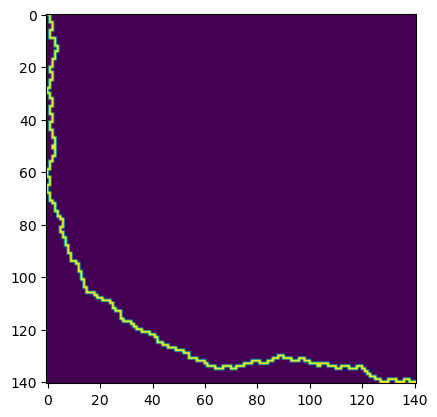

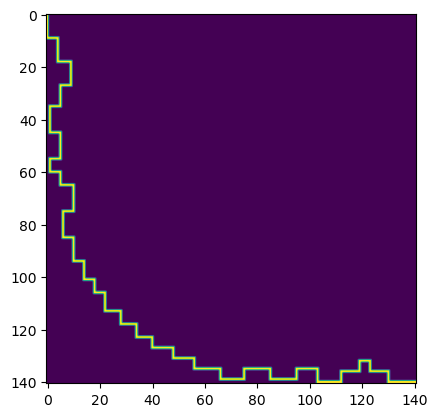

In [17]:
from collections import namedtuple
import heapq
with open('day17.txt') as fid:
    data = fid.read().strip().split('\n')

heat_loss_map = [[int(c) for c in s] for s in data]
Ncol, Nrow = len(heat_loss_map[0]), len(heat_loss_map)
Crucible = namedtuple("Crucible", ['heatloss', 'pos', 'straight_moves', 'direction', 'path'])

def find_best_route(min_straight_moves, max_straight_moves, startpos=(0, 0), finish=((Nrow - 1, Ncol - 1)), get_path=False):
    all_paths = [Crucible(0, startpos, -max_straight_moves, (0, 0), [])]
    heat_loss_dict = {}
    while True:
        valpos = heapq.heappop(all_paths)
        pos = (-valpos.pos[0], -valpos.pos[1])
        heatloss = valpos.heatloss + heat_loss_map[pos[0]][pos[1]]
        if pos == finish:
            if get_path:
                valpos.path.append(pos)
            break
        key = pos + valpos.direction
        if (key in heat_loss_dict 
            and heat_loss_dict[key][0] <= heatloss 
            and heat_loss_dict[key][1] >= abs(valpos.straight_moves)):
            continue
        if get_path:
            valpos.path.append((pos))
        heat_loss_dict[key] = (heatloss, abs(valpos.straight_moves))
        for direction in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
            if direction == (-valpos.direction[0], -valpos.direction[1]):
                continue
            if direction == valpos.direction:
                if abs(valpos.straight_moves) == 0:
                    continue
                straight_moves = abs(valpos.straight_moves) - 1
                newpos = (pos[0] + direction[0], pos[1] + direction[1])
            else:
                straight_moves = max_straight_moves - min_straight_moves
                newpos = (pos[0] + min_straight_moves*direction[0], pos[1] + min_straight_moves*direction[1])
            if not (0 <= newpos[0] < Nrow and 0 <= newpos[1] < Ncol):
                continue
            newheatloss = heatloss
            newpath = [p for p in valpos.path] if get_path else []
            if direction != valpos.direction:
                for j in range(1, min_straight_moves):
                    col2 = pos[0] + j*direction[0]
                    row2 = pos[1] + j*direction[1]
                    if get_path:
                        newpath.append((col2, row2))
                    newheatloss += heat_loss_map[col2][row2]
            new_crucible = Crucible(newheatloss, (-newpos[0], -newpos[1]) ,-straight_moves, direction, newpath)
            heapq.heappush(all_paths, new_crucible)
    return valpos

def make_plot(crucible):
    import matplotlib.pyplot as plt
    plt.figure()
    m = np.zeros((Nrow, Ncol))
    for p in crucible.path:
        m[p[0],p[1]] = 1
    plt.imshow(m)

get_path = True
best_crucible = find_best_route(1, 3, get_path=True)
print(best_crucible.heatloss + heat_loss_map[Nrow - 1][Ncol - 1] - heat_loss_map[0][0])
if get_path:
    make_plot(best_crucible)

# Part two
best_crucible = find_best_route(4, 10, get_path=True)
print(best_crucible.heatloss + heat_loss_map[Nrow - 1][Ncol - 1] - heat_loss_map[0][0])
if get_path:
    make_plot(best_crucible)
